# 용접 데이터에 대한 이해

저항용접 발열량은 Q = 0.24 (I 전류, R 판의 저항, T 통전시간)이며,
Spot 용접의 4대 요소는 용접전류, 통전시간, 가압력, 전극이다. 

'용접전류'는 교류를 주로 사용하며, 
발열량이 I*I에 비례하므로 전류 값은 용접결과에 중요한 변수로, 판 두께가 두꺼울수록 전류 값은 커진다(??) 

'통전시간'은 너깃의 경을 제어하기 위해 통전시간으로 발열과 방
열의 적절한 균형을 조절해야 한다. 열전도가 좋은 재료는 대전류 통전시간을 짧게 한
다. 

'가압력'이 크면 저항이 작아져서 유효발열량은 떨어지나, 작아지면 접촉저항 분포
가 불균일하여 스파크가 발생하므로 조절이 필요하다. 전극의 촉부 면적은 전류밀도
와 연관되어 용접품질에 영향을 미치며, 냉각 여부도 용접품질과 전극 마모율에 영향 
변수이다. 

'전극' 전압 값을 의미


시간 t(sec)의 사이에 발생하는 열량을 H(J)로 하면 
 
H = vit = tRi^2 로 된다.
 
이것을 칼로리(calory)로 나타내면, Q = 0.24tRi^2 로 된다.




https://www.chowel.co.kr/tech_support/technic_article/fundamentals/data_06_02

https://goodb1.tistory.com/entry/스폿Spot용접의-원리-및-특징 

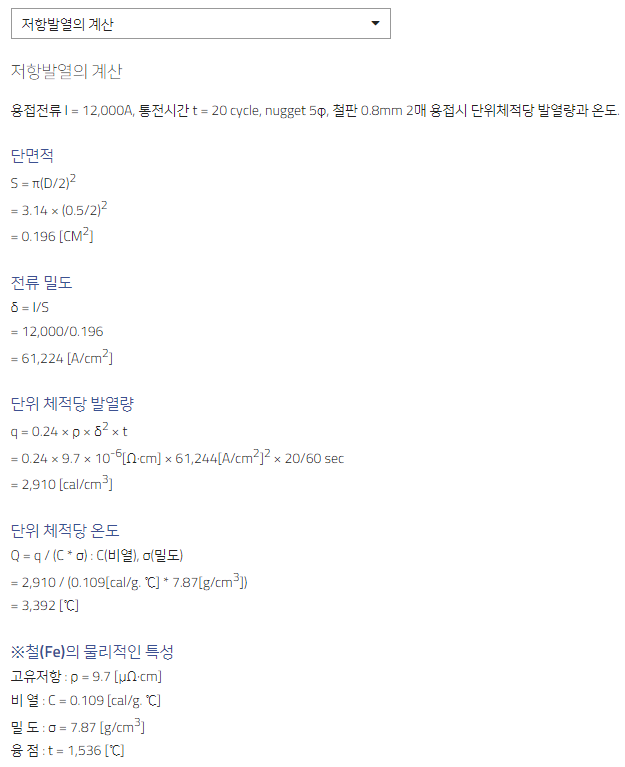

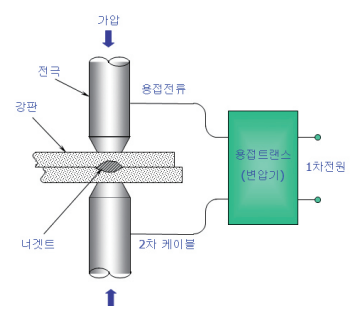

그림과 같이 판의 점접합을 행하는 용접으로서, 두 전극간에 2매의 판을 겹쳐서 넣고 가압하면서 통전하여 발생하는 저항열에 의한 융접(融接) 이며, 이 융합부를 nugget이라 한다

작업속도가 빠르고, 재료비가 절약되며 용접표면이 평평하고 깨끗하여 
차체부품에 많이 이용되는 용접법이다

차량 차체에서 95% 이상은 스팟 용접.

<용접 공정 순서>

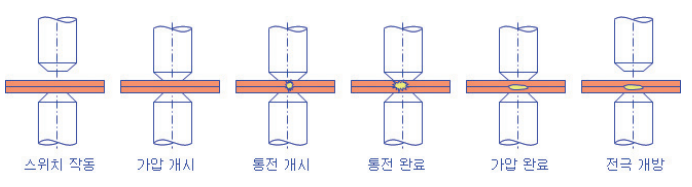

<용접 시간대별 동작>

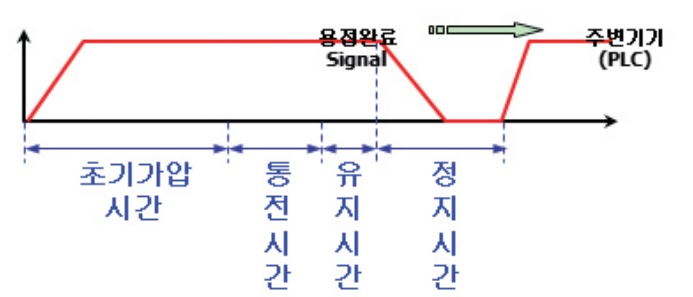

**용접 데이터의 특징 : 정답이 없다. 어떤게 비정상인지에 대한 라벨을 정확하게 매길수 없다. 즉 이상치는 분포로서 확인이 가능할 뿐이다. => 비지도 학습 실시**

분포로써 확인이 가능하다는 것은 적어도 여러 데이터가 있을때에만 그 중 이상치를 구분지을수 있다는 것이다.즉, 용접 데이터의 경우, 물품 각각에 대한 양품 불량 여부는 알 수 없다

# **이상치 탐지, 분류에 대한 이해**

https://www.cognex.com/ko-kr/blogs/deep-learning/research/anomaly-detection-overview-1-introduction-anomaly-detection

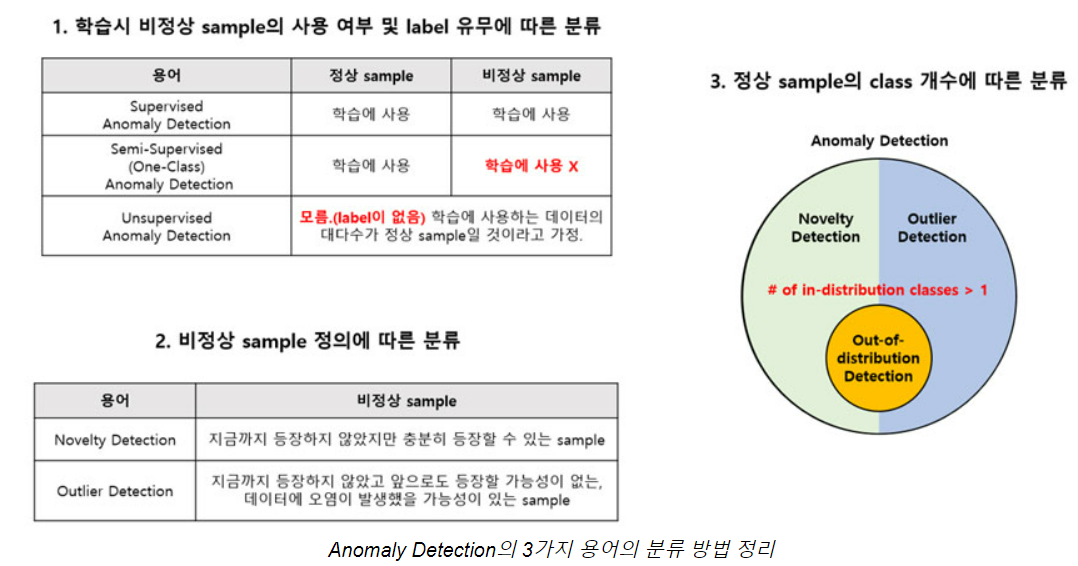

비정상 sample을 정의하는 방식에 따라 크게 Novelty Detection과 Outlier Detection으로 구분한다. 

다만 종종 두 방법론을 합쳐서 Anomaly Detection라 부르기도 한다.

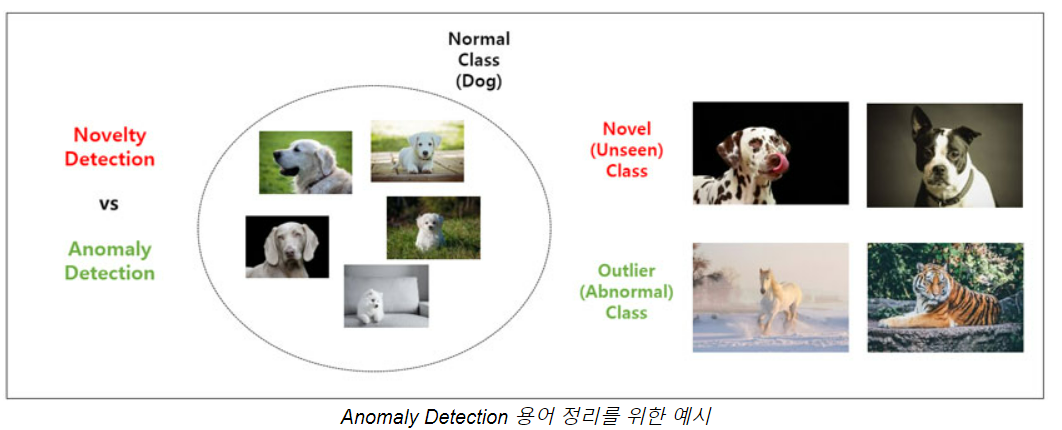

### 위 그림을 풀어쓰면 아래와 같다.

### label이 있다면, 지도학습으로 분류모델을 (RF, SVM 등)

### label이 없다면, 비지도 학습으로 대부분이 정상 샘플이라는 가정하에 이상치 탐지 모델을 (오토 인코더 등)

#### 정상 샘플에 대한 label만 있다면, 세미 지도학습을 통해 정상 샘플에 대한 분포를 학습하고 그 외의 분포값을 갖는 샘플은 이상치로 가정.(1-class SVM, 1-class deep classification 등)



# 데이터 탐색 및 전처리

< 최초 데이터 셋 모습>

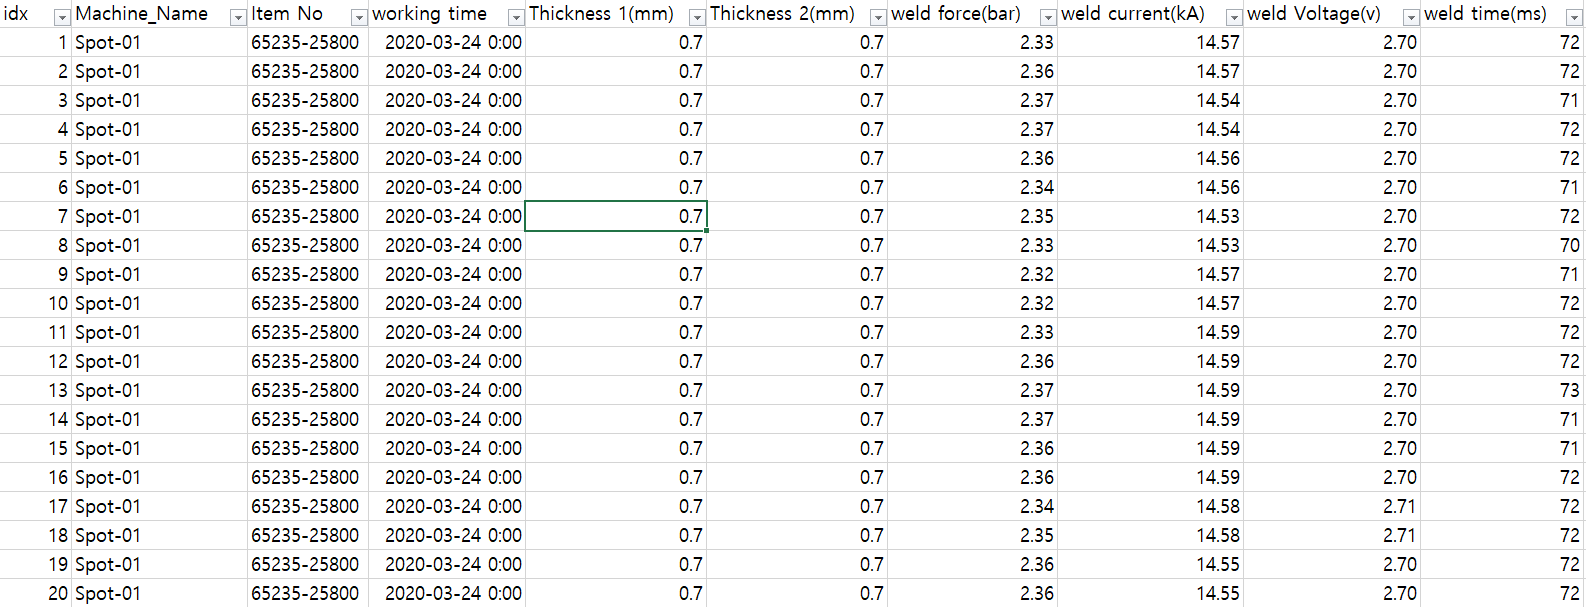

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
raw_data = pd.read_excel('/content/gdrive/MyDrive/kamp/용접기 AI/Welding Data Set_01.xlsx')
raw_data

,idx,Machine_Name,Item No,working time,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
0,1,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.33,14.57,2.701,72.0
1,2,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.57,2.701,72.0
2,3,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,71.0
3,4,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.37,14.54,2.703,72.0
4,5,Spot-01,65235-25800,2020-03-24,0.7,0.7,2.36,14.56,2.704,72.0
...,...,...,...,...,...,...,...,...,...,...
11934,665,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.37,14.55,2.702,72.0
11935,666,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.37,14.60,2.712,72.0
11936,667,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.37,14.60,2.712,71.0
11937,668,Spot-01,65235-25800,2020-04-07,0.7,0.7,2.35,14.53,2.712,71.0


In [4]:
raw_data.describe()

### pdf에 나와있는 통계 값은 오타 내지 오류로 보인다.
### 평균값대비 weld force가 유달리 max값이 튄다.

,idx,Thickness 1(mm),Thickness 2(mm),weld force(bar),weld current(kA),weld Voltage(v),weld time(ms)
count,11939.000000,11939.0,11939.0,11939.000000,11939.000000,11939.000000,11939.000000
mean,732.280761,0.7,0.7,2.787925,14.711208,2.704223,71.724123
std,481.996313,0.0,0.0,1.455966,0.099000,0.024700,0.632049
min,1.000000,0.7,0.7,1.740000,14.520000,2.464000,70.000000
25%,332.000000,0.7,0.7,2.310000,14.610000,2.699000,71.000000
50%,664.000000,0.7,0.7,2.340000,14.730000,2.702000,72.000000
75%,1081.000000,0.7,0.7,2.370000,14.750000,2.706000,72.000000
max,2000.000000,0.7,0.7,10.540000,15.070000,2.861000,73.000000


판 두꼐는 모두 동일하므로 제거해야 할 것이다.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11939 entries, 0 to 11938
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   idx               11939 non-null  int64         
 1   Machine_Name      11939 non-null  object        
 2   Item No           11939 non-null  object        
 3   working time      11939 non-null  datetime64[ns]
 4   Thickness 1(mm)   11939 non-null  float64       
 5   Thickness 2(mm)   11939 non-null  float64       
 6   weld force(bar)   11939 non-null  float64       
 7   weld current(kA)  11939 non-null  float64       
 8   weld Voltage(v)   11939 non-null  float64       
 9   weld time(ms)     11939 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(2)
memory usage: 932.9+ KB


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


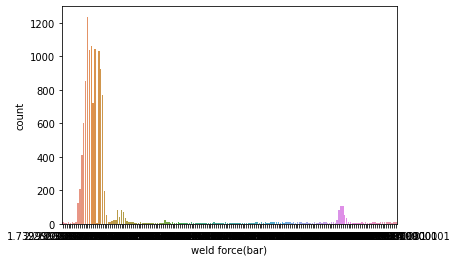

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(raw_data['weld force(bar)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


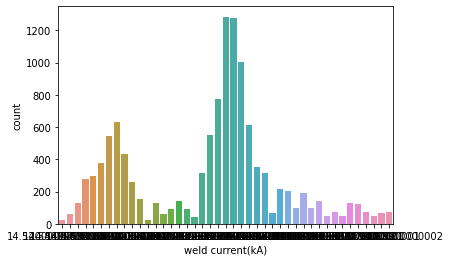

In [11]:
	# weld current(kA)	weld Voltage(v)	weld time(ms)
sns.countplot(raw_data['weld current(kA)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


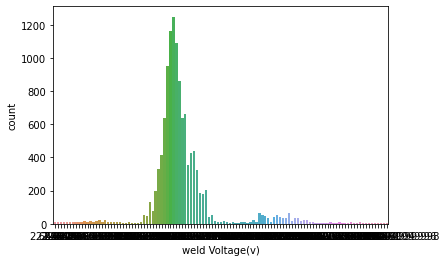

In [12]:
	# weld current(kA)	weld Voltage(v)	weld time(ms)
sns.countplot(raw_data['weld Voltage(v)'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


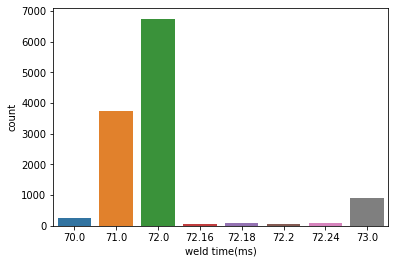

In [13]:
sns.countplot(raw_data['weld time(ms)'])
plt.show()

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
array = scaler.fit_transform(raw_data[['weld force(bar)','weld current(kA)',	'weld Voltage(v)',	'weld time(ms)']])

scaled_df = pd.DataFrame(array, columns = ['weld force(bar)','weld current(kA)',	'weld Voltage(v)',	'weld time(ms)'] )
scaled_df = scaled_df.rename(columns = {'weld force(bar)':'force','weld current(kA)':'current',	'weld Voltage(v)':'voltage',	'weld time(ms)':'time'})
scaled_df

,force,current,voltage,time
0,0.067045,0.090909,0.596977,0.666667
1,0.070455,0.090909,0.596977,0.666667
2,0.071591,0.036364,0.602015,0.333333
3,0.071591,0.036364,0.602015,0.666667
4,0.070455,0.072727,0.604534,0.666667
...,...,...,...,...
11934,0.071591,0.054545,0.599496,0.666667
11935,0.071591,0.145455,0.624685,0.666667
11936,0.071591,0.145455,0.624685,0.333333
11937,0.069318,0.018182,0.624685,0.333333


In [34]:
scaled_df.describe()

,force,current,voltage,time
count,11939.000000,11939.000000,11939.000000,11939.000000
mean,0.119082,0.347651,0.605097,0.574708
std,0.165451,0.180001,0.062216,0.210683
min,0.000000,0.000000,0.000000,0.000000
25%,0.064773,0.163636,0.591940,0.333333
50%,0.068182,0.381818,0.599496,0.666667
75%,0.071591,0.418182,0.609572,0.666667
max,1.000000,1.000000,1.000000,1.000000


In [35]:
scaled_df.corr()

,force,current,voltage,time
force,1.000000,0.411675,0.133876,-0.005557
current,0.411675,1.000000,0.129596,-0.020933
voltage,0.133876,0.129596,1.000000,0.010169
time,-0.005557,-0.020933,0.010169,1.000000


In [28]:
# scaled_data = pd.read_csv('/content/gdrive/MyDrive/kamp/용접기 AI/scaled_data.csv', encoding = 'CP949', index_col = 0)
# scaled_data

,용접 가압력,전류,전압,통전시간
0,0.004482,0.001717,0.002506,0.000461
1,0.005412,0.000501,0.002506,0.000922
2,0.004989,0.000358,0.507830,0.000922
3,0.005243,0.000358,0.002506,0.000922
4,0.005327,0.000143,0.002506,0.000461
...,...,...,...,...
11934,0.005158,0.000715,0.002401,0.000461
11935,0.003721,0.000930,0.002506,0.000922
11936,0.004651,0.001645,0.002610,0.000922
11937,0.005074,0.268136,0.002610,0.000922


In [29]:
# scaled_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11939 entries, 0 to 11938
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   용접 가압력  11921 non-null  float64
 1   전류      11924 non-null  float64
 2   전압      11924 non-null  float64
 3   통전시간    11916 non-null  float64
dtypes: float64(4)
memory usage: 466.4 KB


In [31]:
# scaled_data.dropna()

,용접 가압력,전류,전압,통전시간
0,0.004482,0.001717,0.002506,0.000461
1,0.005412,0.000501,0.002506,0.000922
2,0.004989,0.000358,0.507830,0.000922
3,0.005243,0.000358,0.002506,0.000922
4,0.005327,0.000143,0.002506,0.000461
...,...,...,...,...
11934,0.005158,0.000715,0.002401,0.000461
11935,0.003721,0.000930,0.002506,0.000922
11936,0.004651,0.001645,0.002610,0.000922
11937,0.005074,0.268136,0.002610,0.000922


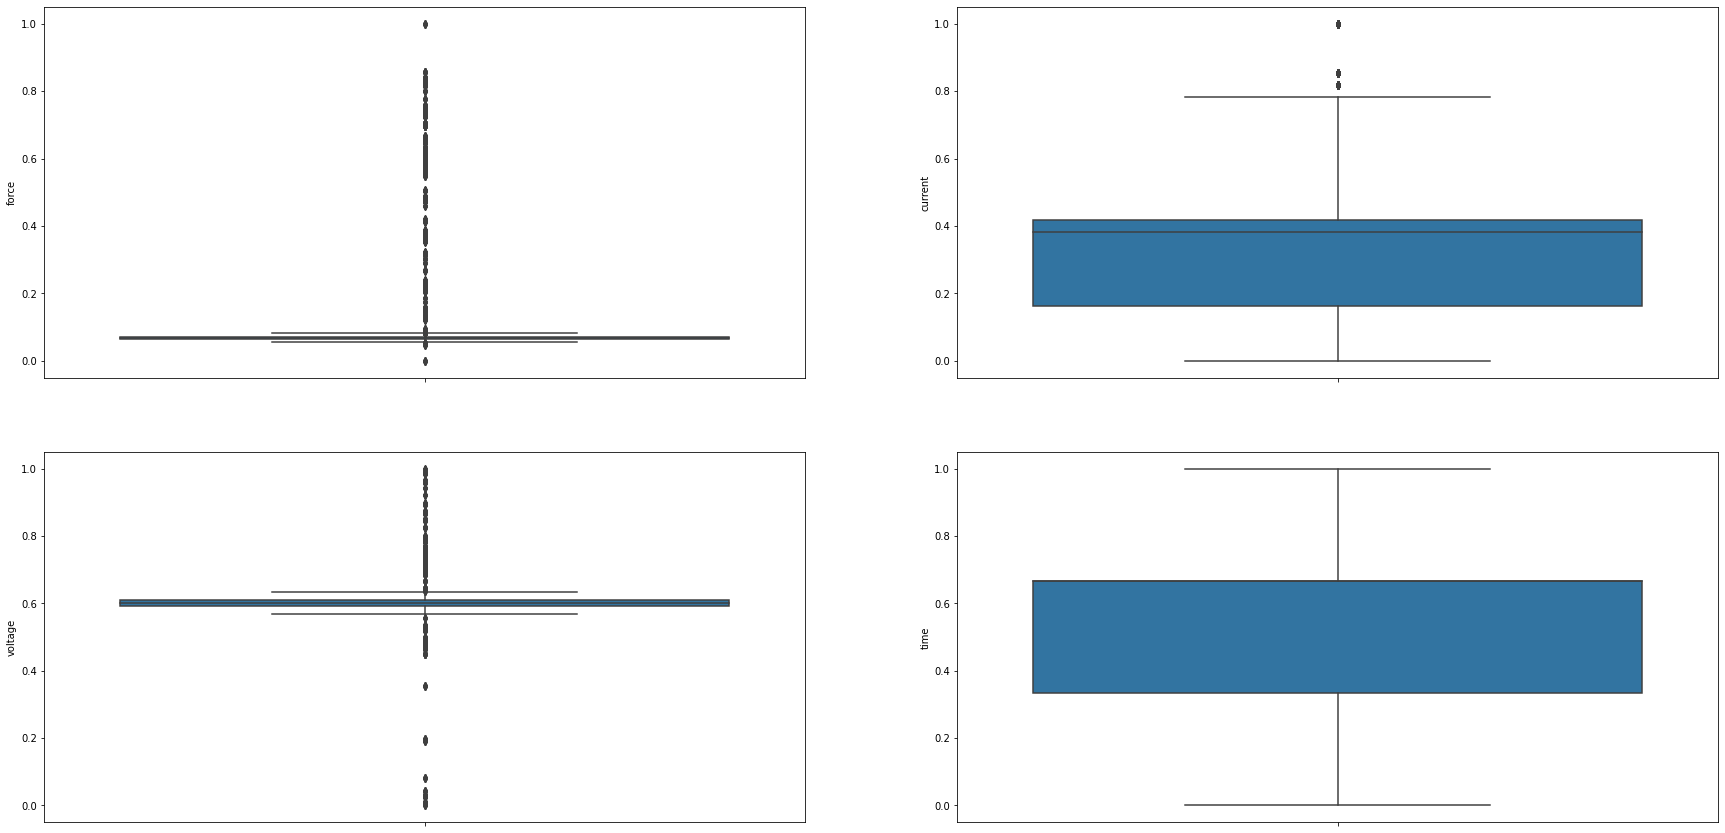

In [36]:
### 이상치 확인 

import matplotlib.pyplot as plt
import seaborn as sns



#subplot에 각 그래프 지정하기
figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)

figure.set_size_inches(30, 15)  # 그래프 크기 정하기

sns.boxplot(data = scaled_df, y = 'force'  ,ax=ax1)
sns.boxplot(data = scaled_df, y = 'current'  ,ax=ax2)
sns.boxplot(data = scaled_df, y = 'voltage'  ,ax=ax3)
sns.boxplot(data = scaled_df, y = 'time'  ,ax=ax4)


# 통계적인 이상치 판단

In [38]:
## 통계적인 이상치 판단    ( 1.5IQR 방식 활용 )

def find_outline(data, quantile_list):      
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = quantile_list[0]
    quantile_75 = quantile_list[1]
    weight =1.5

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowline = quantile_25 - IQR_weight
    highline = quantile_75 + IQR_weight

    if (data > highline) :
        data = 1

    elif (data < lowline):
        data = 1

    else: 
        data = 0

    return data


import numpy as np



df = scaled_df.copy()

for i in range(len(df.columns)):
    

    quantile_25 = np.percentile(df[df.columns[i]].values, 25)
    quantile_75 = np.percentile(df[df.columns[i]].values, 75)
#     print(quantile_25, quantile_75)
    
    df[df.columns[i]] = df[df.columns[i]].apply(find_outline, args = ([quantile_25, quantile_75, i],))
    
    print(df[df.columns[i]].value_counts(), '\n')  ## 1로 출력된다면, 이상치로 의심됨


0    10443
1     1496
Name: force, dtype: int64 

0    11753
1      186
Name: current, dtype: int64 

0    10759
1     1180
Name: voltage, dtype: int64 

0    11939
Name: time, dtype: int64 



In [40]:
## 통계적인 이상치 판단    ( 1.5IQR 방식 활용 )

def find_outline(data, quantile_list):      
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = quantile_list[0]
    quantile_75 = quantile_list[1]
    weight =3

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight

    lowline = quantile_25 - IQR_weight
    highline = quantile_75 + IQR_weight

    if (data > highline) :
        data = 1

    elif (data < lowline):
        data = 1

    else: 
        data = 0

    return data


import numpy as np



df = scaled_df.copy()

for i in range(len(df.columns)):
    

    quantile_25 = np.percentile(df[df.columns[i]].values, 25)
    quantile_75 = np.percentile(df[df.columns[i]].values, 75)
#     print(quantile_25, quantile_75)
    
    df[df.columns[i]] = df[df.columns[i]].apply(find_outline, args = ([quantile_25, quantile_75, i],))
    
    print(df[df.columns[i]].value_counts(), '\n')  ## 1로 출력된다면, 이상치로 의심됨


0    10731
1     1208
Name: force, dtype: int64 

0    11939
Name: current, dtype: int64 

0    10787
1     1152
Name: voltage, dtype: int64 

0    11939
Name: time, dtype: int64 



통계적인 기법으로 접근시, 이상치가 많이 나온다. 그리고 다차원으로의 종합적인 판단이 어렵다.

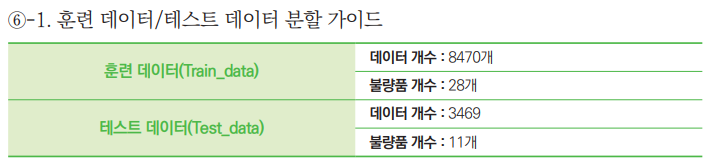

그러나, 가이드에서는 이상치가 39개라고 말한다. 이유도 없고 그냥 갑자기 나온 수치다.....

# 오토인코더를 활용한 비지도 학습

In [25]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import torch.nn.init
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

In [67]:
class AutoEncoder(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(AutoEncoder, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.AutoEncoder = nn.Sequential(
        ## 인코더
        nn.Linear(input_size, hidden_size[0]),
        nn.RReLU(),
        nn.Linear(hidden_size[0], output_size),
        nn.RReLU(),

        ## 디코더
        nn.Linear(output_size, hidden_size[0]),
        nn.RReLU(),
        nn.Linear(hidden_size[0], input_size)
    )

  def forward(self, inputs):
    output = self.AutoEncoder(inputs)

    return output

In [68]:
# Train 데이터를 0~8469 (8470개), Test 데이터를 8470~11939(3469개)로 나눔

train_data = torch.Tensor(scaled_df[:8470].to_numpy())

test_data = torch.Tensor(scaled_df[8470:].to_numpy())


In [69]:
## 하이퍼 파라미터 및 손실함수 등 정의

epoch = 70
batch_size = 64

lr = 0.01

input_size = len(train_data[0])
hidden_size = [3]
output_size = 2

criterion = nn.MSELoss()

optimizer = torch.optim.Adam

model_AE = AutoEncoder(input_size, hidden_size, output_size)

In [70]:
def train_net(model, data, criterion, epochs, lr_rate):
  model.train()

  optim = optimizer(model.parameters(), lr = lr_rate)

  data_loader = DataLoader(data, batch_size = batch_size, shuffle = True)

  for epoch in range(1, epochs+1):
    running_loss = 0.0

    for x in data_loader:
      optim.zero_grad()

      output = model(x)

      loss = criterion(x, output)

      loss.backward()
      optim.step()

      running_loss += loss.item()

    print(epoch, running_loss)

  return AutoEncoder



In [72]:
AutoEncoder = train_net(model_AE, train_data, criterion, epoch, lr)

1 0.35704860743135214
2 0.3180682483362034
3 0.3256110231450293
4 0.3190154236217495
5 0.3188136556709651
6 0.32144456056994386
7 0.32904300950758625
8 0.3315208918065764
9 0.3328767486382276
10 0.3251783029991202
11 0.32274151407182217
12 0.3268012345652096
13 0.3157699224539101
14 0.3301993206841871
15 0.3467906344158109
16 0.32069690205389634
17 0.32663873268757015
18 0.3194733877899125
19 0.3213864277349785
20 0.32740440050838515
21 0.3245834175031632
22 0.32017921045189723
23 0.3228541989810765
24 0.31808110687416047
25 0.32333210622891784
26 0.332400165440049
27 0.3313649949268438
28 0.32544996129581705
29 0.3246680680895224
30 0.31530501798260957
31 0.31825511512579396
32 0.33007101697148755
33 0.33668903066427447
34 0.3244095501722768
35 0.3179852979956195
36 0.32134984532603994
37 0.3111849348351825
38 0.31658103567315266
39 0.32830577139975503
40 0.3241248656413518
41 0.3146610594121739
42 0.32167764886980876
43 0.32175423309672624
44 0.33974087779643014
45 0.3185814488097094

In [77]:
## 임계값 정의하기

## 학습된 model에 대해 train data를 다시 입력하여, loss 값을 구한다.
## 이 loss 값들의 평균과 편차를 활용하여, 일정 loss값 이상을 넘는 샘플을 이상치로 판단하는 방식

train_loss_list = []
for data in train_data:
  model_AE.eval()
  output = model_AE(data)
  loss = criterion(output, data)
  train_loss_list.append(loss.item())

threshold = np.mean(train_loss_list) + np.std(train_loss_list)*8    ## 8을 왜 붙였는지에 대한 설명은 없다, 하이퍼 파라미터??
threshold 

0.06828353953027996

In [84]:
test_loss_list = []

for data in test_data:
  model_AE.eval()
  output = model_AE(data)
  loss = criterion(output, data)
  test_loss_list.append(loss.item())

outlier = list(test_loss_list >= threshold)
print(outlier.count(True))

index = []
for i in range(len(outlier)):
  if outlier[i] == True:
     index.append(i)

index

12


[2405, 2406, 2407, 2408, 2409, 2410, 2411, 2412, 2413, 2414, 2415, 2416]

In [177]:
len(outlier)

3469

In [81]:
# list count 기능

a = [1,2,3,13,1,1,1]

a.count(1)

4

In [85]:
test_data[index]

tensor([[0.0852, 0.3818, 0.0428, 0.3333],
        [0.0852, 0.4182, 0.0428, 0.6667],
        [1.0000, 0.4182, 0.0302, 0.6667],
        [1.0000, 0.4364, 0.0302, 0.6667],
        [0.8557, 0.4364, 0.0252, 0.6667],
        [0.8557, 0.4727, 0.0252, 0.6667],
        [0.8330, 0.4727, 0.0101, 0.6667],
        [0.8330, 0.4182, 0.0101, 0.6667],
        [0.8261, 0.4182, 0.0000, 0.3333],
        [0.8261, 0.5636, 0.0000, 0.3333],
        [0.8307, 0.5636, 0.0076, 0.3333],
        [0.8307, 0.5091, 0.0076, 0.3333]])

In [86]:
scaled_df.describe()

,force,current,voltage,time
count,11939.000000,11939.000000,11939.000000,11939.000000
mean,0.119082,0.347651,0.605097,0.574708
std,0.165451,0.180001,0.062216,0.210683
min,0.000000,0.000000,0.000000,0.000000
25%,0.064773,0.163636,0.591940,0.333333
50%,0.068182,0.381818,0.599496,0.666667
75%,0.071591,0.418182,0.609572,0.666667
max,1.000000,1.000000,1.000000,1.000000


test 데이터에서의 이상치를 11개라고 하였는데 ,유사한 값이 나왔다.... 

딥러닝 모델로는 종합적인 관점에서의 이상치를 판단할수 있는 장점이 있다. 

# PCA와 군집화를 통해 이상치를 탐지할수 있을까?

In [87]:
from sklearn.decomposition import PCA

pca = PCA()   ## PC 성분을 100개로 뽑아보기
pca.fit(scaled_df)
pc_transform = pca.transform(scaled_df)

pca.components_

array([[ 0.19473108,  0.25789374,  0.01266873, -0.94626113],
       [ 0.60114997,  0.72917084,  0.05027342,  0.32311174],
       [ 0.77395564, -0.63301169,  0.01082423, -0.01310357],
       [ 0.04112405,  0.03311972, -0.99859648,  0.00411995]])

In [88]:
ratio = pca.explained_variance_ratio_
ratio   

array([0.41322639, 0.39114382, 0.16077575, 0.03485403])

In [161]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model3 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model3.fit(scaled_df)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pd.Series(model3.fit_predict(scaled_df)).value_counts()

0    7318
1    4621
dtype: int64

In [160]:
from sklearn.cluster import KMeans

k = 2

# 그룹 수, random_state 설정
model3 = KMeans(n_clusters = k, random_state = 10)

# 정규화된 데이터에 학습
model3.fit(pc_transform)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
pd.Series(model3.fit_predict(pc_transform)).value_counts()

0    7946
1    3993
dtype: int64

In [97]:
!pip install pyclustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 5.2 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=fd4cc015e4eb911a3dfdf6212a46cbac9fba99ac5e8efae662412e65958430cc
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
Successfully built pyclustering


In [99]:

from pyclustering.cluster import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette

kmedoids_ins = kmedoids.kmedoids(scaled_df.values,initial_index_medoids=[0,5000]) # initial_index는 df행 중 대푯값 행 지정
kmedoids_ins.process()
clusters = kmedoids_ins.get_clusters()
score = silhouette(scaled_df.values, clusters).process().get_score()
print("평균 실루엣값 : ",sum(score)/len(score))
# medoids = kmeans_plusplus_initializer(PCA_jachigu_df, 4).initialize(return_index=True)
# kmedoids_instance = kmedoids(PCA_jachigu_df, medoids)
# clusters = kmedoids_instance.process().get_clusters()
print('###########################################')
print('[K-대푯값 군집 분석 결과]')


for i in range(len(clusters)):
  scaled_df.loc[scaled_df.reset_index().index.isin(clusters[i]), 'cluster'] = i

scaled_df

평균 실루엣값 :  0.8897925510568229
###########################################
[K-대푯값 군집 분석 결과]


,force,current,voltage,time,cluster
0,0.067045,0.090909,0.596977,0.666667,0
1,0.070455,0.090909,0.596977,0.666667,0
2,0.071591,0.036364,0.602015,0.333333,1
3,0.071591,0.036364,0.602015,0.666667,0
4,0.070455,0.072727,0.604534,0.666667,0
...,...,...,...,...,...
11934,0.071591,0.054545,0.599496,0.666667,0
11935,0.071591,0.145455,0.624685,0.666667,0
11936,0.071591,0.145455,0.624685,0.333333,1
11937,0.069318,0.018182,0.624685,0.333333,1


In [102]:
scaled_df['cluster'].value_counts()

0    7318
1    4621
Name: cluster, dtype: int64

In [163]:

from pyclustering.cluster import kmedoids
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer
from pyclustering.cluster.silhouette import silhouette

kmedoids_ins = kmedoids.kmedoids(pc_transform,initial_index_medoids=[0,5000]) # initial_index는 df행 중 대푯값 행 지정
kmedoids_ins.process()
clusters = kmedoids_ins.get_clusters()
score = silhouette(pc_transform, clusters).process().get_score()
print("평균 실루엣값 : ",sum(score)/len(score))
# medoids = kmeans_plusplus_initializer(PCA_jachigu_df, 4).initialize(return_index=True)
# kmedoids_instance = kmedoids(PCA_jachigu_df, medoids)
# clusters = kmedoids_instance.process().get_clusters()
print('###########################################')
print('[K-대푯값 군집 분석 결과]')


평균 실루엣값 :  0.5446044113251435
###########################################
[K-대푯값 군집 분석 결과]


In [169]:
for i in range(len(clusters)):
  print(len(clusters[i]))

3993
7946


dbscan의 python 적용과 min_samples(minpts / eps의 개념

https://bcho.tistory.com/1205

https://claryk.tistory.com/7

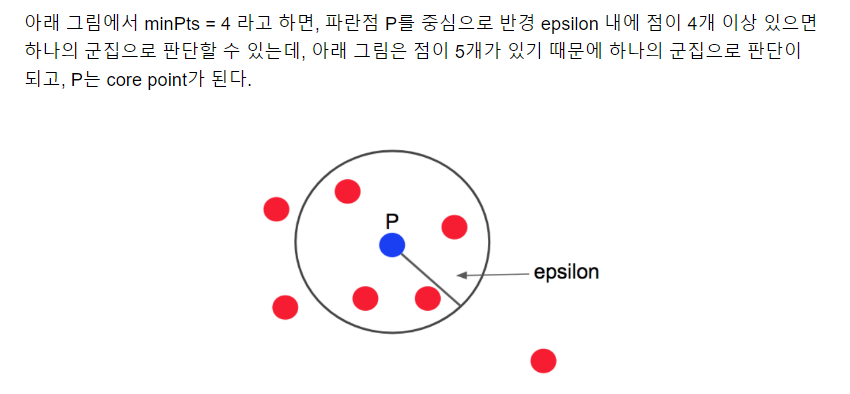

In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import DBSCAN



In [176]:
dbscan = DBSCAN(eps=0.3, min_samples=1).fit(scaled_df)

labels = dbscan.labels_

pd.Series(labels).value_counts()

0     7310
1     3727
6      560
2      238
8       60
9       20
4        8
3        4
5        4
7        4
10       4
dtype: int64

In [174]:
dbscan = DBSCAN(eps=0.3, min_samples=1).fit(pc_transform)

labels = dbscan.labels_

pd.Series(labels).value_counts()

0    7934
1    3727
2     238
7      20
4       8
3       4
5       4
6       4
dtype: int64

PCA를 썼을때 조금 좋아지기는 했지만, 군집화 방식은 이상치 탐지에 적합하지 않다.
그리고 파라미터를 지정하기가 막연하다. 

(참고 사이트에서는 dbscan으로 제법 이상치를 군집화하였음....)


딥러닝은 상대적으로 자유로움.

# 1-class SVM
오토 인코더 모델로 test시 2400번대의 샘플들이 이상치로 탐지되었다. 이를 토대로 test샘플에서의 2000번까지를 정상치로 가정하고 1-class SVM을 적용해보자

https://limitsinx.tistory.com/147

In [185]:
import numpy as np

import matplotlib.pyplot as plt

import matplotlib.font_manager

from sklearn import svm

In [228]:
new_train_data = test_data.numpy()[:2300]
new_test_data = test_data.numpy()[200:]

In [229]:
new_train_data.shape, new_test_data.shape

((2300, 4), (3269, 4))

In [237]:
clf = svm.OneClassSVM(nu = 0.005, kernel = "rbf")

clf.fit(new_train_data)

y_pred_test = clf.predict(new_test_data)

ocsvm_index_list = []
for i in range(len(y_pred_test)):
  if y_pred_test[i] != 1:         ## 1 for inliers, -1 for outliers.
    ocsvm_index_list.append(i)

In [238]:
len(ocsvm_index_list)

319

In [239]:
ocsvm_index_list

[93,
 294,
 295,
 458,
 1871,
 1946,
 1985,
 2045,
 2071,
 2107,
 2145,
 2162,
 2172,
 2173,
 2203,
 2204,
 2205,
 2206,
 2207,
 2208,
 2209,
 2210,
 2211,
 2212,
 2213,
 2214,
 2215,
 2216,
 2217,
 2218,
 2219,
 2220,
 2221,
 2222,
 2223,
 2224,
 2225,
 2226,
 2227,
 2228,
 2229,
 2230,
 2231,
 2232,
 2233,
 2234,
 2235,
 2236,
 2237,
 2238,
 2239,
 2240,
 2241,
 2242,
 2243,
 2244,
 2245,
 2246,
 2247,
 2248,
 2249,
 2250,
 2251,
 2252,
 2253,
 2254,
 2255,
 2256,
 2257,
 2258,
 2259,
 2260,
 2261,
 2262,
 2263,
 2264,
 2265,
 2266,
 2267,
 2268,
 2269,
 2270,
 2271,
 2272,
 2273,
 2274,
 2275,
 2276,
 2277,
 2278,
 2279,
 2280,
 2281,
 2282,
 2283,
 2284,
 2285,
 2286,
 2287,
 2288,
 2289,
 2290,
 2291,
 2292,
 2293,
 2294,
 2295,
 2296,
 2297,
 2298,
 2299,
 2300,
 2301,
 2302,
 2303,
 2304,
 2305,
 2306,
 2307,
 2308,
 2309,
 2310,
 2311,
 2312,
 2313,
 2314,
 2315,
 2316,
 2317,
 2318,
 2319,
 2320,
 2321,
 2322,
 2323,
 2324,
 2325,
 2326,
 2327,
 2328,
 2329,
 2330,
 2334,
 233

정답이 없으니 뭐가 맞는지 모르겠으나,
군집화보다도 성능이 안좋은 것 같다.

가이드북에서 말한 11개가 맞다면, 머신러닝 쪽은 전반적으로 이상치 검출 성능이 떨어진다.